# HEALTHCARE ANALYSIS ON HEART DISEASE DATA
Problem Statement: Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The “goal” field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Attribute Information:

age> 2. sex> 3. chest pain type (4 values)> 4. resting blood pressure>
serum cholesterol in mg/dl> 6. fasting blood sugar > 120 mg/dl> 7. resting electrocardiographic results (values 0,1,2)> 8. maximum heart rate achieved> 9. exercise induced angina> 10. oldpeak = ST depression induced by exercise relative to rest> 11. the slope of the peak exercise ST segment> 12. number of major vessels (0-3) colored by flourosopy> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect Find key metrics and factors and show the meaningful relationships between attributes. 

Do your own research and come up with your findings.

Analysis on Heart diseas.

To predict whether the patient has heart disease or not.

In [103]:
# IMPORTING DATA AND EXPLORING DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [104]:
hd = pd.read_csv("Heart disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.10,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.80,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.60,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.40,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.80,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.00,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.20,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.60,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.40,0,0,0,0


In [105]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.10,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.80,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.60,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.40,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.80,1,0,0,0


In [106]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [107]:
hd.shape

(297, 14)

In [108]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [109]:
type(hd)

pandas.core.frame.DataFrame

In [110]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [111]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.10,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.80,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.60,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.40,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.80,1,0,0,0


# EDA (Exploratory Data Analysis)
Using Data Visualization

1.age: Patients age in years

2.sex : Female or male (1-Male,0-Female)

3.cp :Chest pain ( 1- Typical Angina, 2-Atypical Angina,3-Non- anginal pain, 4-Asymptomatic)

4.trestbp: Resting BloodPressure

5.chol :Cholestrol

6.fbs : Fasting Blood Sugar( >120 mg/dl, 1-True, 0 - False)

7.restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach :The person's maximum heart rate achieved

9.exang : Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca :The number of major vessels (0-3)

13.thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target : Heart disease (0 = no, 1 = yes)

In [112]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,2.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.60,0.68,0.84,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,0.96,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,2.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,1.00,2.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,0.00,0.00
75%,61.00,1.00,3.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,2.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,2.00,1.00


In [113]:
pd.set_option('display.float_format','{:.2f}'.format)

In [114]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,2.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.60,0.68,0.84,0.46
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,0.96,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,2.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,1.00,2.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,0.00,0.00
75%,61.00,1.00,3.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,2.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,2.00,1.00


In [115]:
hd['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [116]:
hd.shape

(297, 14)

In [117]:
hd['target'].value_counts()/hd.shape[0]*100

0   53.87
1   46.13
Name: target, dtype: float64

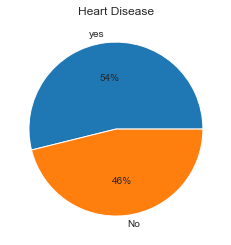

In [118]:
# percentage of positive and negative heart diseases
labels = ['yes', 'No']
values = hd['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

# Histagram plot for all feature 

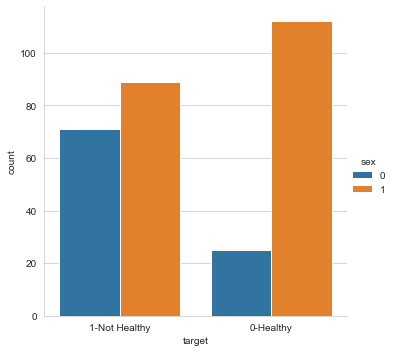

In [119]:
sns.catplot('target', data=hd, hue='sex', kind='count')
plt.xticks(np.arange(2), ("1-Not Healthy", "0-Healthy"),rotation=0);

In [120]:
hd['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

From the above Histogram plots we can conclude Age, Cholestrol, Resting blood pressure and person's maximum heart rate achieved plays major role in detection of Heart Disease.

From the another plot we can conclude that number of men are majorly having Heart disease than compared to females.And also men are more healthier than females

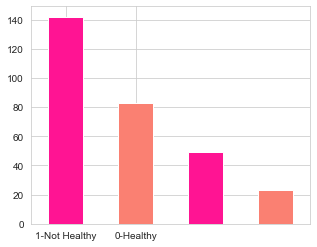

In [121]:
hd['cp'].value_counts().plot(kind='bar',color=["deeppink","salmon"])
plt.xticks(np.arange(2), ("1-Not Healthy", "0-Healthy"),rotation=0);

In [122]:
# Possibility of having Heart Disease 
#Creating a Function for unique values in data
categorical_values = []
for column in hd.columns:
    print('==============================')
    print(f"{column} : {hd[column].unique()}")
    if len(hd[column].unique()) <= 10:
        categorical_values.append(column)

age : [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol : [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
f

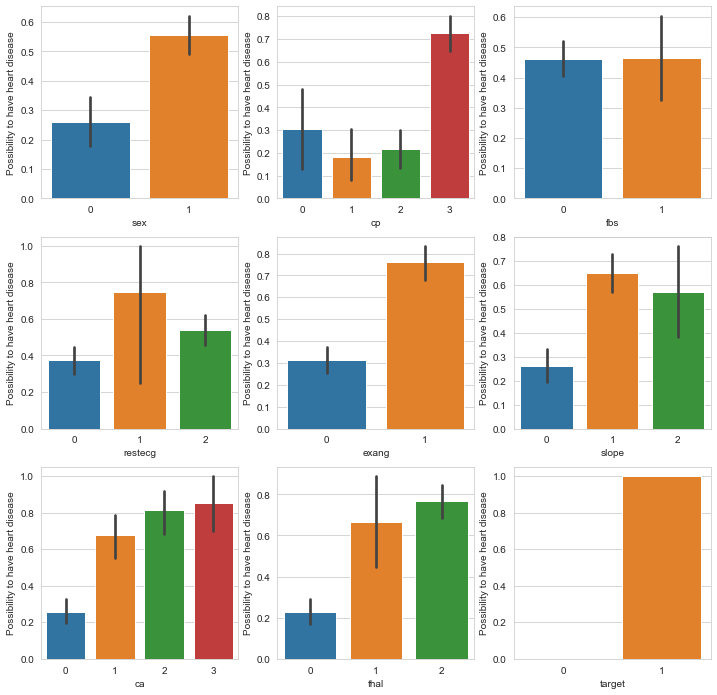

In [123]:
plt.figure(figsize=(12,  12))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=hd)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

The possibility of having Heart Disease can be judged from the above barplots.

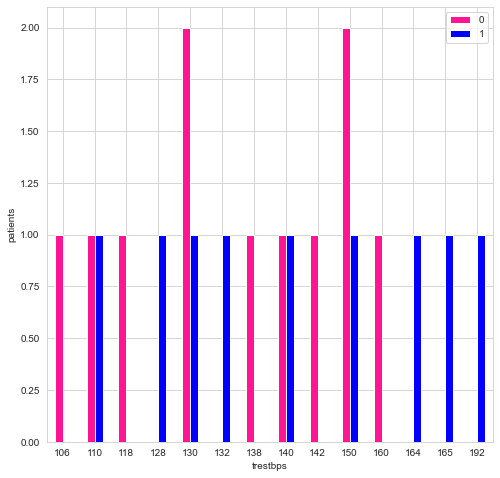

In [124]:
# Comparing resting blood pressure with target

pd.crosstab(hd.trestbps[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']);  

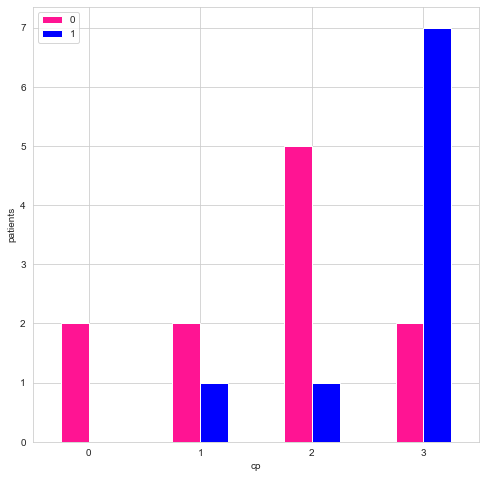

In [125]:
# Comparing cholestrol with target
#cp :Chest pain ( 1- Typical Angina, 2-Atypical Angina,3- Non-anginal pain, 4-Asymptomatic)

pd.crosstab(hd.cp[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']); 


The above graph tells us that patients with Type 3 chest pain have heart disease. and verty few Patients with 1 type chest pain have heart disease

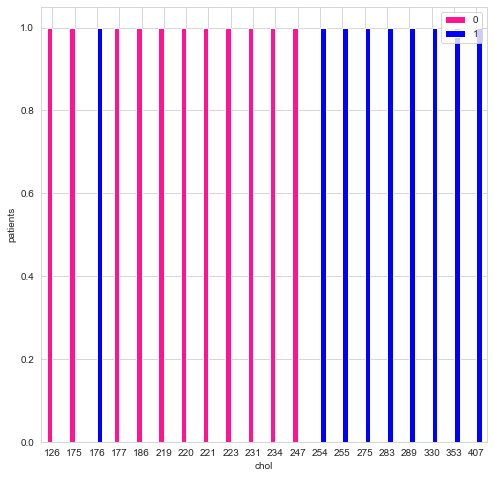

In [126]:
# Comparing cholestrol with target
pd.crosstab(hd.chol[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']); 

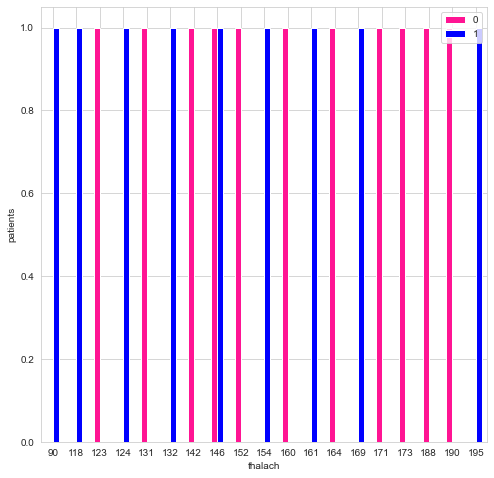

In [127]:
# Comparing maximum heart rate with target
pd.crosstab(hd.thalach[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']);

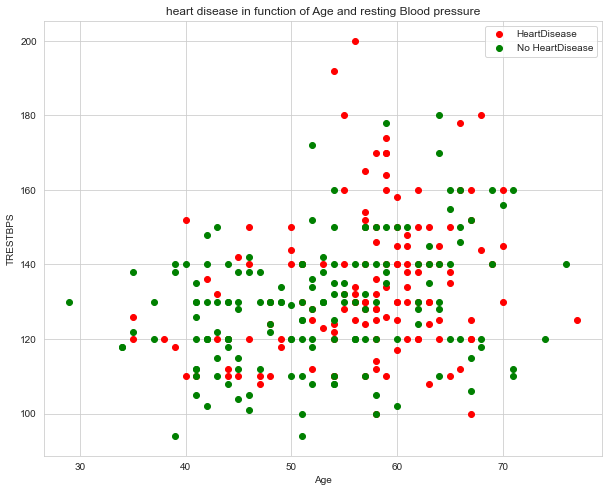

In [128]:
# fINDING Heart Disease PEOPLE WITH restingBloodPressure AND AGE  USING SCATTER PLOT

plt.figure(figsize=(10,8))
plt.scatter(hd.age[hd.target==1],hd.trestbps[hd.target==1],color="Red")

plt.scatter(hd.age[hd.target==0],hd.trestbps[hd.target==0],color="Green")

plt.title("heart disease in function of Age and resting Blood pressure")
plt.xlabel("Age")
plt.ylabel("TRESTBPS")
plt.legend(["HeartDisease","No HeartDisease"]);

<AxesSubplot: >

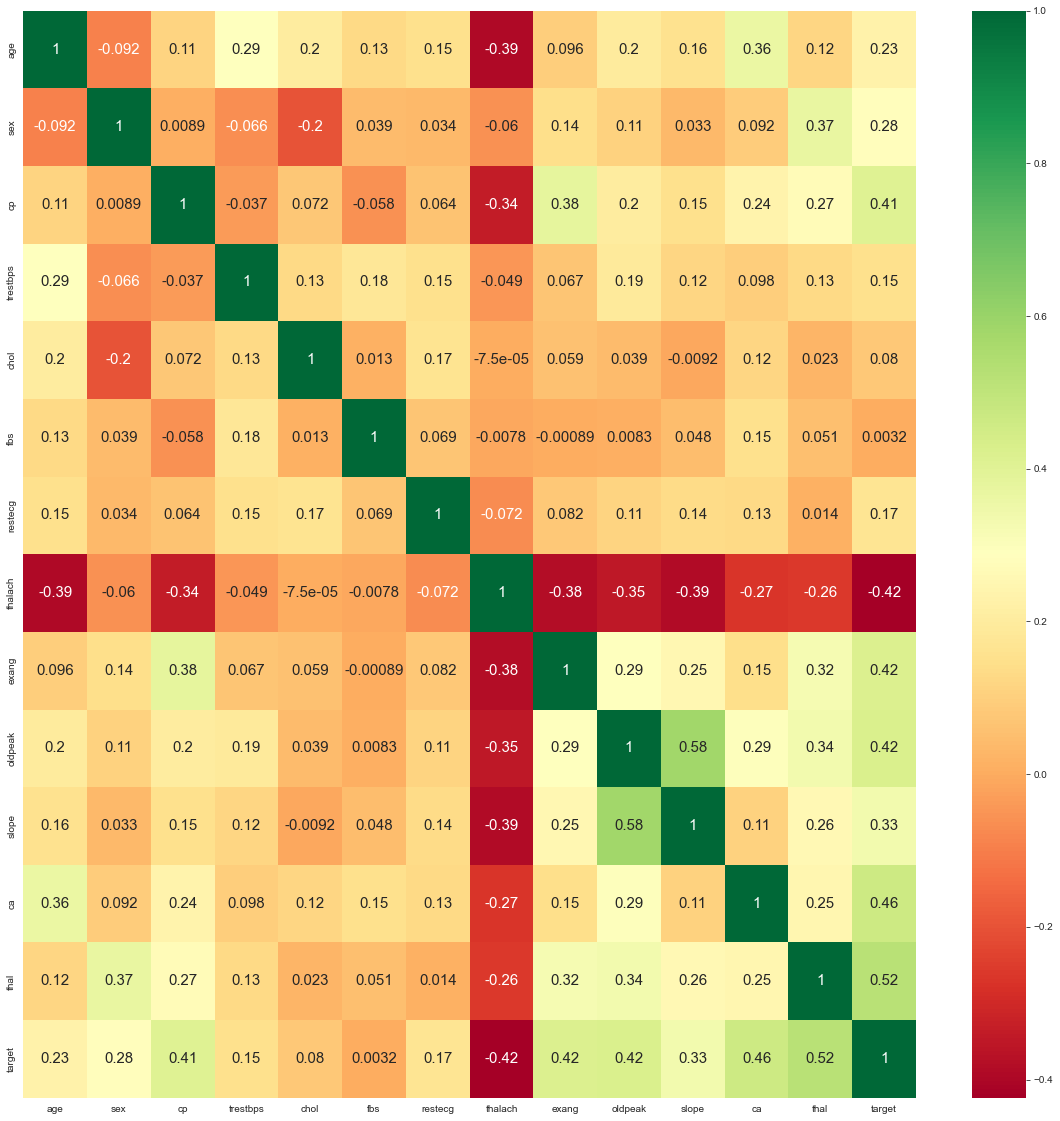

In [129]:
# To knw thw relation between various features

corr_matrix = hd.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(hd[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# OBSERVATION
1.Major features for having Heart diesease are : Resting blood pressure, Cholestrol, Chest pain and Maximum Heart rates achieved.

2.The data is not disbalanced.

3.From the another plot we can conclude that number of men are majorly having Heart disease than compared to females.And also men are more healthier than females.

4.The graph tells us that patients with Type 3 chest pain have heart disease and very few Patients with 1 type chest pain can have heart disease.

In [130]:
# creating a copy of dataset 
heart = hd.copy()

In [131]:
heart.shape

(297, 14)

In [132]:
heart = heart.rename(columns={'condition':'target'})
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.10,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.80,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.60,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.40,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.80,1,0,0,0


# Lets divide our data set and use training dataset for model training, and test dataset is to eveluate model perfomance

In [133]:
from sklearn.model_selection import train_test_split

x= heart.drop(columns= 'target')
y= heart.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


# Feature scaling


In [134]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

# Linear regression

In [135]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train_scaler, y_train)
y_pred_lr= lr_clf.predict(x_test_scaler)
lr_clf.score(x_test_scaler,y_test)

0.37913776240450037

# LOGISTIC REGRESSION


In [136]:
from sklearn.linear_model import LogisticRegression

logr_clf= LogisticRegression()
logr_clf.fit(x_train_scaler, y_train)
y_pred_lor= logr_clf.predict(x_test_scaler)
logr_clf.score(x_test_scaler,y_test)

0.76

In [137]:
print('LogistiC Regression Classification Report\n', classification_report(y_test, y_pred_lor))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_lor)*100),2)))
print('Precision: {}%\n'.format(round((precision_score(y_test, y_pred_lor)*100))))
print('Recall: {}%\n'.format(round((recall_score(y_test, y_pred_lor)*100))))

LogistiC Regression Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%

Precision: 77%

Recall: 73%



In [138]:
cm = confusion_matrix(y_test, y_pred_lor)
cm

array([[30,  8],
       [10, 27]], dtype=int64)

# Decision Tree classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train_scaler, y_train)
y_pred_dct= dt_clf.predict(x_test_scaler)
dt_clf.score(x_test_scaler,y_test)

0.72

In [140]:
print(' DT Classification Report\n', classification_report(y_test, y_pred_dct))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_dct)*100),2)))
print('Precision: {}%\n'.format(round((precision_score(y_test, y_pred_dct)*100))))
print('Recall: {}%\n'.format(round((recall_score(y_test, y_pred_dct)*100))))

 DT Classification Report
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.69      0.78      0.73        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75

Accuracy: 72.0%

Precision: 69%

Recall: 78%



In [141]:
cm = confusion_matrix(y_test, y_pred_dct)
cm

array([[25, 13],
       [ 8, 29]], dtype=int64)

# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(x_train_scaler, y_train)
y_pred_rfc= rf_clf.predict(x_test_scaler)
rf_clf.score(x_test_scaler,y_test)

0.8

In [143]:
print('Random Forest Classification Report\n', classification_report(y_test, y_pred_rfc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_rfc)*100),2)))
print('Precision: {}%\n'.format(round((precision_score(y_test, y_pred_rfc)*100))))
print('Recall: {}%\n'.format(round((recall_score(y_test, y_pred_rfc)*100))))

Random Forest Classification Report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.79      0.81      0.80        37

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75

Accuracy: 80.0%

Precision: 79%

Recall: 81%



In [144]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[30,  8],
       [ 7, 30]], dtype=int64)

# SVM

In [145]:
from sklearn.svm import SVC

svc_clf= SVC()
svc_clf.fit(x_train_scaler, y_train)
y_pred_svc= svc_clf.predict(x_test_scaler)
svc_clf.score(x_test_scaler,y_test)

0.7866666666666666

In [146]:
print(' SVM Classification Report\n', classification_report(y_test, y_pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))
print('Precision: {}%\n'.format(round((precision_score(y_test, y_pred_svc)*100))))
print('Recall: {}%\n'.format(round((recall_score(y_test, y_pred_svc)*100))))

 SVM Classification Report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        38
           1       0.78      0.78      0.78        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75

Accuracy: 78.67%

Precision: 78%

Recall: 78%



In [147]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[30,  8],
       [ 8, 29]], dtype=int64)

In [149]:
import pickle

filename = 'Healthcare_Analysis_on_Heart_Disease.pkl'
pickle.dump(rf_clf, open(filename, 'wb'))